# Process Mining Disease Trajectory

In [1]:
import pandas as pd

In [2]:
# Change the 'source' variable with the appropriate file location in your computer
source = "M:\PM_DTM\ToyData_PM_DTM.csv"

# Load the event log into a data frame
eventlog = pd.read_csv(source)

In [3]:
# See the event data
eventlog

,Subject_id,Diagnosis,Time
0,1,I21,01/01/2100
1,1,I21,02/01/2100
2,1,I25,31/01/2100
3,2,I21,02/01/2100
4,2,I25,02/06/2100
...,...,...,...
111,49,I50,01/01/2100
112,49,J15,02/01/2100
113,49,M10,05/03/2100
114,50,I20,01/01/2100


In [4]:
# Removing the duplicate events and put them into a new data frame
# Dataframe 'filtered_eventlog' will be created

## Select and then uncomment the necessary statement below
removeduplicate = True
#removeduplicate = False

if removeduplicate == True:
    filtered_eventlog = eventlog.drop_duplicates(subset= {'Subject_id', 'Diagnosis'}, keep='first')
else:
    filtered_eventlog = eventlog.copy()

In [5]:
filtered_eventlog

,Subject_id,Diagnosis,Time
0,1,I21,01/01/2100
2,1,I25,31/01/2100
3,2,I21,02/01/2100
4,2,I25,02/06/2100
5,3,I21,01/01/2100
...,...,...,...
111,49,I50,01/01/2100
112,49,J15,02/01/2100
113,49,M10,05/03/2100
114,50,I20,01/01/2100


In [6]:
# Optional
# Save the filtered event log into a .csv file

#filtered_eventlog.to_csv("M:\PM_STM\Filtered_eventlog.csv", index=False, encoding='utf-8')

# Graph Isomorphism Checker

In [7]:
import networkx as nx
from networkx.algorithms import isomorphism
import matplotlib.pyplot as plt

In [8]:
# Create the graph data from the trajectory model adapted from A. B. Jensen et al. (2014)
# (see the Figure 1 from the paper)

g_Jensen = nx.DiGraph()
g_Jensen.add_edges_from([('I20', 'I25'),
                         ('I20', 'I48'),
                         ('I20', 'I50'),
                         ('I20', 'K29'),
                         ('I21', 'I25'),
                         ('I25', 'J18'),
                         ('I25', 'N30'),
                         ('I25', 'M10'),
                         ('I48', 'M10'),
                         ('I50', 'M10'),
                         ('I50', 'J15'),
                         ('K29', 'I50'),
                         ('J15', 'M10'),])

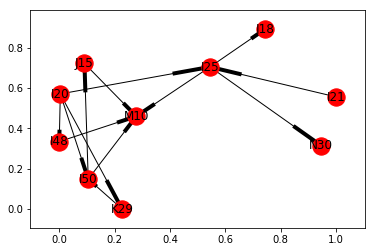

In [9]:
# Visualise the trajectory model adapted from A. B. Jensen et al. (2014)

pos = nx.spring_layout(g_Jensen)
nx.draw_networkx(g_Jensen, pos)
plt.show()

In [10]:
# Create the graph data from the trajectory model created by process mining tool (Disco)
# (see the Figure 3 from the paper)

g_promin = nx.DiGraph()
g_promin.add_edges_from([('I20', 'K29'),
                         ('I20', 'I48'),
                         ('I20', 'I50'),
                         ('I20', 'I25'),
                         ('I25', 'J18'),
                         ('I25', 'N30'),
                         ('I25', 'M10'),
                         ('I21', 'I25'),
                         ('I50', 'J15'),
                         ('I50', 'M10'),
                         ('K29', 'I50'),
                         ('I48', 'M10'),
                         ('J15', 'M10'),])

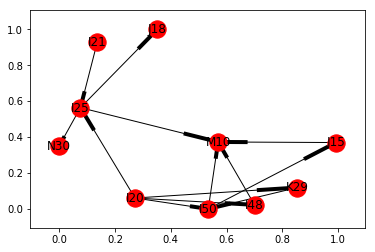

In [11]:
# Visualise the trajectory model created by process mining tool (Disco)

pos = nx.spring_layout(g_promin)
nx.draw_networkx(g_promin, pos)
plt.show()

In [12]:
# Check whether the graphs are isomorphic

nx.is_isomorphic(g_Jensen, g_promin)

True